# Travel Insurance Predictive Models

### 1) Pilot Study

Imagine that you work as Machine Learning independent consultant, providing scientific advisory and consulting services to companies seeking to apply data analytics to their business activities. A travel insurance company would like to offer a discounted premium (for the same cover requested) to customers that are less likely to make a future claim. The manager contacts you to investigate the feasibility of using machine learning to predict whether a customer will file a claim on their travel. The manager has access to historical data of past policies and she offers to provide you with information about the insured, the purpose and destination of the travel, and whether a claim was filed.

In the first part of your project, you are asked to write a detailed proposal for a pilot study to investigate whether machine learning procedures could be used to successfully solve this problem.

Your report should discuss several aspects of the problem, including the following main points:
- the type of predictive task that must be performed (e.g., classification, regression, clustering, rules mining, ...);
- examples of possibly informative features that you would like to be provided with (what type of information that the company could obtain from/about the customer is likely to be a good predictor?);
- the learning procedure or procedures (e.g., DTs, k-NN, k-means, linear regression, Apriori, SVMs, ...) you would choose and the reason for your choice;
- how you would evaluate the performance of your system before deploying it.

You can assume that the manager has some knowledge of machine learning and you do not need to explain how the recommended learning method works. Simply discuss your recommendation and back it with sound arguments and/or references.

### 2) Comparative Study
Thanks to the convincing arguments in your pilot-study proposal, the company decides to collect the data that you suggested and to hire you to perform the proposed study. They provide you with a training set of historical data containing features of each customer and a label representing whether
the insured filed a claim. These data are available shared in Github repository. In this part of the project, you are asked to perform the following two tasks.

a) Investigate the performance of a number of machine learning procedures on this dataset. Using the data in the file TravelInsurance.csv contained in the TravelInsurance_Classification.zip archive, you are required to perform a comparative study of the following machine learning procedures:
- a Decision Tree classifier;
- at least two more ML technique to predict if the insured will file a claim.
You will notice that one of the features, is missing for some of the instances. You are therefore required to deal with the problem of missing features before you can proceed with the prediction step. As a baseline approach you may try to discard the feature altogether and train on the remaining
features. You are then encouraged to experiment with different inputation methods.
The company uses Python internally and therefore Python with scikit-learn is the required
language and machine learning library for the problem. For this task, you are expected to submit a
Jupyter Notebook called TravelInsurance_Classification.ipynb containing the Python code used to perform
the comparative analysis and produce the results, as well as the code used to perform the predictions
described in task “b” below.

b) Prediction on a hold-out test set. An additional dataset, TravelInsurance_TestSet.csv, is provided
inside the TravelInsurance_Classification.zip archive. Binary outcomes are withheld for this test set (i.e. the
“Class” column is empty). In this second task you are required to produce class predictions of
the records in the test set using one approach of your choice among those tested in task “a” (for
example the one achieving the best performance). These data must not be used other than to test
the algorithm trained on the training data.
As part of your submission you should submit a new version of the file TravelInsurance_TestSet.csv in
CSV format with the missing class replaced with the output predictions obtained using the approach
chosen. This second task will be marked based on the prediction accuracy on the test set.


# Decision Tree classifier
We will build a model using four different classification algorithms which are **decision tree**, **support vector machine**, **logistic regression** and **random forest**. This is the very first machine learning technique we will use to approach the problem and compare the various performance metrics.

### Import all the libraries from Sci-kit learn

In [505]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [506]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

### Load the travel insurance dataset

In [507]:
data=pd.read_csv("TravelInsurance_Classification\TravelInsurance.csv")
data.head(7)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
5,30,386.88,-20.94,-20.34,10.70,533.22,-4.12,-4.22,-8.97,14.50,-11.00,20.89,-9.09,330,NaN,False
6,3,170.88,-34.56,-27.32,0.36,242.22,3.18,-6.92,-14.61,1.28,-22.00,7.89,-3.20,2,6.49,False


### Examine the number of rows and columns in the dataset

In [508]:
data.shape

(1500, 16)

### Explore the dataset and see if there are any missing values.

In [509]:
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

### Drop the column 'F15,' which contains 750 missing values.

In [510]:
data.drop(['F15'], axis=1, inplace=True)

### Examine the dataset to ensure that the modifications were made right.

In [511]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,True


### Pass all columns except 'class' to the variable X.

In [512]:
X = data[['F1','F2','F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']].values 
X[0:5]

array([[ 3.00e+01,  1.87e+02, -2.11e+01, -1.77e+01,  1.42e+01,  5.63e+02,
        -3.29e+00, -5.32e+00, -1.89e+01,  9.20e+00, -9.44e+00,  1.09e+01,
        -8.54e+00,  5.10e+02],
       [ 3.00e+01,  1.97e+02, -2.29e+01, -1.94e+01,  1.97e+01,  3.53e+02,
        -5.71e+00, -1.48e+00, -1.83e+01,  7.15e+00, -8.58e+00,  1.59e+01,
        -8.44e+00,  7.60e+02],
       [ 3.00e+01,  9.69e+01, -1.96e+01, -1.65e+01,  1.73e+01,  3.98e+02,
        -5.19e+00, -1.96e+00, -1.46e+01,  7.10e+00, -9.18e+00,  2.09e+01,
        -8.79e+00,  6.10e+02],
       [ 3.00e+00,  2.17e+02, -3.32e+01, -2.78e+01,  8.40e-01,  3.44e+02,
        -8.60e-01, -6.89e+00, -1.47e+01,  9.00e-02, -1.80e+01,  7.89e+00,
        -3.78e+00,  3.20e+01],
       [ 3.00e+00,  1.99e+02, -3.25e+01, -2.63e+01,  1.52e+00,  2.78e+02,
         8.00e-02, -7.73e+00, -1.36e+01,  1.91e+00, -2.39e+01,  7.89e+00,
        -3.25e+00,  3.60e+01]])

### Use the variable y to store the 'class' value, also known as the target variable that we will be predicting.

In [513]:
y=data["Class"] 
y[0:5]

0    False
1    False
2    False
3    False
4     True
Name: Class, dtype: bool

### Normalize the dataset 

In [514]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 1.02,  0.11,  1.02, ..., -0.37, -0.65,  1.24],
       [ 1.02,  0.23,  0.78, ...,  0.33, -0.62,  2.31],
       [ 1.02, -1.01,  1.2 , ...,  1.03, -0.73,  1.67],
       ...,
       [ 1.02, -0.89,  1.43, ...,  1.03, -1.68,  0.65],
       [ 1.02,  1.98,  0.67, ...,  2.43, -0.49,  0.14],
       [-0.98,  0.51, -0.69, ..., -0.51,  1.14, -0.86]])

### Over-sampling and under-sampling on unbalanced data

In [515]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.7.0


0.7.0
Class=0, n=383 (35.661%)
Class=1, n=691 (64.339%)


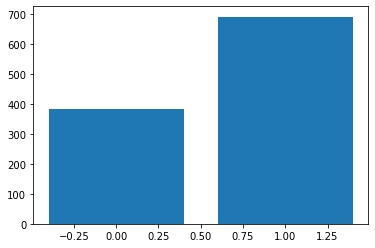

In [516]:
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [517]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### To build the model, use the decision tree classifier.

In [518]:
fileclaimedTree = DecisionTreeClassifier()
fileclaimedTree

DecisionTreeClassifier()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [519]:
#pass the parameters for decision tree classifier
param_dict={"criterion":['gini', 'entropy'],
           "max_depth":range(1,12),
           "min_samples_split": range(1,12),
           "min_samples_leaf": range(1,5)}

### This informs us of the best parameter for our model's efficiency.

In [520]:
grid= GridSearchCV(fileclaimedTree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 968 candidates, totalling 9680 fits


C:\Users\danla\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72  nan 0.72 0.72
 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72  nan 0.72 0.72 0.72 0.72 0.72
 0.72 0.72 0.72 0.72 0.72  nan 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72
 0.72 0.72  nan 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79  nan
 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79 0.79  nan 0.79 0.79 0.79
 0.79 0.79 0.79 0.79 0.79 0.79 0.79  nan 0.79 0.79 0.79 0.79 0.79 0.79
 0.79 0.79 0.79 0.79  nan 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8
 0.8   nan 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8   nan 0.8
 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8   nan 0.8  0.8  0.8  0.8
 0.8  0.8  0.8  0.8  0.8  0.8   nan 0.8  0.8  0.8  0.81 0.81 0.81 0.81
 0.81 0.81 0.81  nan 0.8  0.8  0.8  0.8  0.8  0.8  0.81 0.8  0.8  0.81
  nan 0.81 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.81  nan 0.8  0.8
 0.8  0.8

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 12),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 12)},
             verbose=1)

### This will yield the most effective parameters for our decision tree classifier.

In [521]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

### Examine the estimator 

In [522]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=6)

### Investigate the optimal score for the decision tree classifier's parameters.

In [523]:
grid.best_score_

0.8231053351573185

### Now, apply the above-mentioned parameters for the decision tree classifier

In [ ]:
fileclaimedTree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=6, min_samples_leaf=3)
fileclaimedTree

### To train the model, use the fit function.

In [525]:
fileclaimedTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=6)

### Let us now apply the predict to our test set.

In [526]:
y_pred = fileclaimedTree.predict(x_test)

### We can use cross validation to further analyse the model's performance on its test set.

In [527]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(fileclaimedTree.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(fileclaimedTree.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(fileclaimedTree, x_train, y_train, cv=10) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        78
           1       0.81      0.86      0.83       137

    accuracy                           0.78       215
   macro avg       0.77      0.75      0.76       215
weighted avg       0.78      0.78      0.78       215

Accuracy of Decision Tree classifier on the training set: 0.89
Accuracy of Decision Tree classifier on the test set: 0.78
Cross-validation score:  [0.81 0.79 0.86 0.83 0.74 0.87 0.85 0.77 0.8  0.87]
Cross-validation mean score:  0.8196169630642954


### Let's build a function that will return the results of various metrics.

In [528]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)

### Summarize the model's performance using the various classification metrics.

In [529]:
summarize_classification(y_test, y_pred)

Length of testing data:  215
accuracy_count :  168
accuracy_score :  0.7813953488372093
f1_score :  0.7781794154098486
precision_score :  0.7778965885009073
recall_score :  0.7813953488372093
jaccard_score :  0.6427067122919436


In [530]:
y_pred = fileclaimedTree.predict(x_test)

### Let us now compare how well our model predicts on unseen data.

In [615]:
#Accuracy performance
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(15)

,y_test,y_pred
161,1,1
141,1,1
177,1,1
134,0,0
51,1,1
111,1,0
153,1,1
138,0,0
58,0,0
145,1,1


In [532]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [533]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

### Plot the graph of a Decision Tree classifier

In [534]:
dot_data = StringIO()
filename = "fileclaimedTree.png"
featureNames = data.columns[0:14]
targetNames = data["Class"].unique().tolist()
dotout=tree.export_graphviz(fileclaimedTree,feature_names=featureNames, out_file=dot_data, filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(300, 300))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine
This is another classification technique that is renowned for producing high model performance precision. We will use the same approach as we did with the decision tree above. The only feature that will be change here is just the use of a different classifier.

### Load the travel insurance dataset

In [535]:
datasvm=pd.read_csv("TravelInsurance_Classification\TravelInsurance.csv")
datasvm.head(7)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
5,30,386.88,-20.94,-20.34,10.70,533.22,-4.12,-4.22,-8.97,14.50,-11.00,20.89,-9.09,330,NaN,False
6,3,170.88,-34.56,-27.32,0.36,242.22,3.18,-6.92,-14.61,1.28,-22.00,7.89,-3.20,2,6.49,False


### Explore the dataset and see if there are any missing values.

In [536]:
datasvm.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

### Drop the column 'F15,' which contains 750 missing values.

In [537]:
datasvm.drop(['F15'], axis=1, inplace=True)

### Examine the dataset to ensure that the modifications were made right.

In [538]:
datasvm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,True


### Pass all columns except 'class' to the variable X.

In [539]:
datasvm=data[['F1','F2','F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']].values 
X= np.asarray(datasvm)
X[0:5]

array([[ 3.00e+01,  1.87e+02, -2.11e+01, -1.77e+01,  1.42e+01,  5.63e+02,
        -3.29e+00, -5.32e+00, -1.89e+01,  9.20e+00, -9.44e+00,  1.09e+01,
        -8.54e+00,  5.10e+02],
       [ 3.00e+01,  1.97e+02, -2.29e+01, -1.94e+01,  1.97e+01,  3.53e+02,
        -5.71e+00, -1.48e+00, -1.83e+01,  7.15e+00, -8.58e+00,  1.59e+01,
        -8.44e+00,  7.60e+02],
       [ 3.00e+01,  9.69e+01, -1.96e+01, -1.65e+01,  1.73e+01,  3.98e+02,
        -5.19e+00, -1.96e+00, -1.46e+01,  7.10e+00, -9.18e+00,  2.09e+01,
        -8.79e+00,  6.10e+02],
       [ 3.00e+00,  2.17e+02, -3.32e+01, -2.78e+01,  8.40e-01,  3.44e+02,
        -8.60e-01, -6.89e+00, -1.47e+01,  9.00e-02, -1.80e+01,  7.89e+00,
        -3.78e+00,  3.20e+01],
       [ 3.00e+00,  1.99e+02, -3.25e+01, -2.63e+01,  1.52e+00,  2.78e+02,
         8.00e-02, -7.73e+00, -1.36e+01,  1.91e+00, -2.39e+01,  7.89e+00,
        -3.25e+00,  3.60e+01]])

### Use the variable y to store the 'class' value, also known as the target variable that we will be predicting.

In [540]:
datasvm=data["Class"] 
y= np.asarray(datasvm)
y[0:5]

array([False, False, False, False,  True])

### Standardize the dataset

In [541]:
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 1.02,  0.11,  1.02, ..., -0.37, -0.65,  1.24],
       [ 1.02,  0.23,  0.78, ...,  0.33, -0.62,  2.31],
       [ 1.02, -1.01,  1.2 , ...,  1.03, -0.73,  1.67],
       ...,
       [ 1.02, -0.89,  1.43, ...,  1.03, -1.68,  0.65],
       [ 1.02,  1.98,  0.67, ...,  2.43, -0.49,  0.14],
       [-0.98,  0.51, -0.69, ..., -0.51,  1.14, -0.86]])

### Over-sampling and under-sampling on unbalanced data

In [542]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.7.0


0.7.0
Class=0, n=383 (35.661%)
Class=1, n=691 (64.339%)


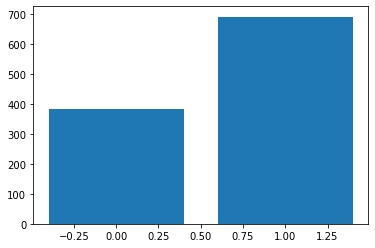

In [543]:
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 70 percent for training and 30 percent for testing.

In [544]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (751, 14) (751,)
Test set: (323, 14) (323,)


### To build the model, import SVM from the sci-kit learn library

In [546]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train) 

SVC()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [547]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### This will yield the most effective parameters for our svm classifier.

In [548]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


### Explore the estimator 

In [549]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


### Investigate the optimal score for the svm classifier's parameters.

In [550]:
grid.best_score_

0.9214657836644593

### Now, apply the above-mentioned parameters for the svm classifier

In [551]:
clf = SVC(C=100, gamma=0.1, kernel= 'rbf')
clf.fit(x_train, y_train) 

SVC(C=100, gamma=0.1)

### Let us now apply the predict to our test set.

In [552]:
y_pred = clf.predict(x_test)

### We can use cross validation to further analyse the model's performance on its test set.

In [553]:
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(clf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(clf, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       108
           1       0.92      0.97      0.95       215

    accuracy                           0.93       323
   macro avg       0.93      0.91      0.91       323
weighted avg       0.93      0.93      0.92       323

Accuracy of Decision Tree classifier on the training set: 0.99
Accuracy of Decision Tree classifier on the test set: 0.93
Cross-validation score:  [0.9  0.96 0.9  0.91 0.93]
Cross-validation mean score:  0.9214657836644593


### Let's build a function that will return the results of various metrics.


In [554]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)

### Using the different classification metrics, summarise the model's results.

In [555]:
summarize_classification(y_test, y_pred)

Length of testing data:  323
accuracy_count :  299
accuracy_score :  0.9256965944272446
f1_score :  0.924737470590968
precision_score :  0.9258243648336528
recall_score :  0.9256965944272446
jaccard_score :  0.8613606509438778


### Let us now compare how well our model predicts on unseen data.

In [616]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
105,0,0
203,1,1
198,1,1
40,0,0
20,1,1
195,1,1
32,1,1
130,1,1
190,1,1
177,1,1


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [557]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [558]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       108
           1       0.92      0.97      0.95       215

    accuracy                           0.93       323
   macro avg       0.93      0.91      0.91       323
weighted avg       0.93      0.93      0.92       323

Confusion matrix, without normalization
[[ 91  17]
 [  7 208]]


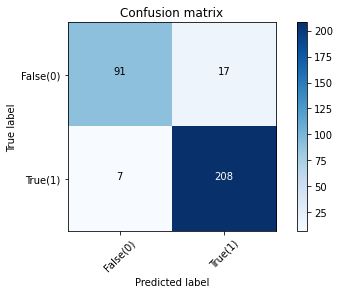

In [559]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

# Logistic Regression Classifier

In [560]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

### Load the travel insurance dataset

In [561]:
datalr=pd.read_csv("TravelInsurance_Classification\TravelInsurance.csv")
datalr.head(7)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
5,30,386.88,-20.94,-20.34,10.70,533.22,-4.12,-4.22,-8.97,14.50,-11.00,20.89,-9.09,330,NaN,False
6,3,170.88,-34.56,-27.32,0.36,242.22,3.18,-6.92,-14.61,1.28,-22.00,7.89,-3.20,2,6.49,False


### Drop the column 'F15,' which contains 750 missing values.

In [562]:
datalr.drop(['F15'], axis=1, inplace=True)
datalr.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,True


### Pass all columns except 'class' to the variable X.

In [563]:
datalr=data[['F1','F2','F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']]
X= datalr
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36


### Use the variable y to store the 'class' value, also known as the target variable that we will be predicting.

In [564]:
datalr=data["Class"] 
y= datalr
y

0       False
1       False
2       False
3       False
4        True
        ...  
1495     True
1496    False
1497     True
1498    False
1499     True
Name: Class, Length: 1500, dtype: bool

### Normalize the dataset

In [565]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.02,  0.11,  1.02,  1.08,  0.94,  0.5 , -0.54,  0.06, -1.33,
         0.98,  1.13, -0.37, -0.65,  1.24],
       [ 1.02,  0.23,  0.78,  0.75,  1.73, -0.48, -1.51,  1.6 , -1.16,
         0.5 ,  1.3 ,  0.33, -0.62,  2.31],
       [ 1.02, -1.01,  1.2 ,  1.32,  1.38, -0.27, -1.3 ,  1.4 , -0.05,
         0.49,  1.18,  1.03, -0.73,  1.67],
       [-0.98,  0.48, -0.58, -0.91, -0.99, -0.52,  0.42, -0.58, -0.08,
        -1.13, -0.54, -0.79,  0.85, -0.79],
       [-0.98,  0.26, -0.49, -0.61, -0.89, -0.83,  0.8 , -0.91,  0.25,
        -0.71, -1.71, -0.79,  1.02, -0.78]])

### Over-sampling and under-sampling on unbalanced data

In [566]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.7.0


0.7.0
Class=0, n=383 (35.661%)
Class=1, n=691 (64.339%)


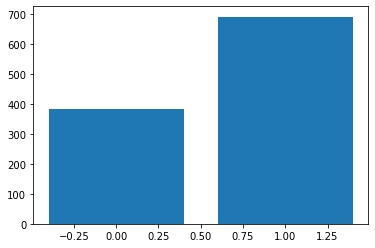

In [567]:
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [568]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (859, 14) (859,)
Test set: (215, 14) (215,)


### To build the model, import Logistic regression from the sci-kit learn library

In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(x_train,y_train)
LR

LogisticRegression()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [570]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [571]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

### This will yield the most effective parameters for our Logistic Regression classifier.

In [572]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892923 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892923 (0.032886) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892923 (0.032886) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892923 (0.032886) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.882832 (0.035204) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.882832 (0.035204) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.882832 (0.035204) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.870415 (0.036075) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.870415 (0.036075) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.870027 (0.036736) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.818792 (0.044789) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.818792 (0.044789) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.817624 (0.045175) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.764460 (0.044187) wit

### Now, apply the above-mentioned parameters for the Logistic Regression classifier

In [573]:
model=LogisticRegression(C=100, penalty='l2', solver='newton-cg')
model=model.fit(x_train,y_train)

### Let us now apply the predict to our test set.

In [574]:
y_pred = model.predict(x_test)

### We can use cross validation to further analyse the model's performance on its test set.

In [575]:
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(model.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(model, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: {:.2f}',score.mean())

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        86
           1       0.88      0.95      0.92       129

    accuracy                           0.90       215
   macro avg       0.90      0.88      0.89       215
weighted avg       0.90      0.90      0.90       215

Accuracy of Decision Tree classifier on the training set: 0.90
Accuracy of Decision Tree classifier on the test set: 0.90
Cross-validation score:  [0.89 0.96 0.87 0.88 0.84]
Cross-validation mean score: {:.2f} 0.8870257037943696


### Let's build a function that will return the results of various metrics.

In [576]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)

### Using the different classification metrics, summarise the model's results.

In [577]:
summarize_classification(y_test, y_pred)

Length of testing data:  215
accuracy_count :  193
accuracy_score :  0.8976744186046511
f1_score :  0.8964252810023953
precision_score :  0.8993563044301401
recall_score :  0.8976744186046511
jaccard_score :  0.8133133433283359


### Let us now compare how well our model predicts on unseen data.

In [617]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
177,1,1
78,1,1
81,0,0
38,0,0
171,1,1
93,1,1
73,1,1
203,1,1
133,1,1
28,1,1


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [579]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def ConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[123   6]
 [ 16  70]]


              precision    recall  f1-score   support

           0       0.92      0.81      0.86        86
           1       0.88      0.95      0.92       129

    accuracy                           0.90       215
   macro avg       0.90      0.88      0.89       215
weighted avg       0.90      0.90      0.90       215

Confusion matrix, without normalization
[[123   6]
 [ 16  70]]


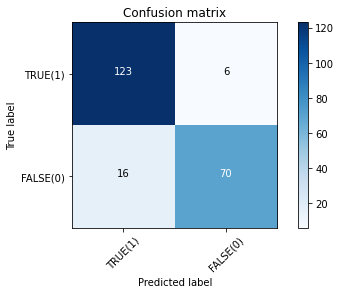

In [580]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['TRUE(1)','FALSE(0)'],normalize= False,  title='Confusion matrix')

# Random Forest Classifier

In [584]:
from sklearn.ensemble import RandomForestClassifier

### Load the travel insurance dataset

In [585]:
datarand=pd.read_csv("TravelInsurance_Classification\TravelInsurance.csv")
datarand.head(7)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
5,30,386.88,-20.94,-20.34,10.70,533.22,-4.12,-4.22,-8.97,14.50,-11.00,20.89,-9.09,330,NaN,False
6,3,170.88,-34.56,-27.32,0.36,242.22,3.18,-6.92,-14.61,1.28,-22.00,7.89,-3.20,2,6.49,False


### Drop the column 'F15,' which contains 750 missing values.

In [586]:
datarand.drop(['F15'], axis=1, inplace=True)
datarand.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,True


### Pass all columns except 'class' to the variable X.

In [587]:
datarand=data[['F1','F2','F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']]
X= datarand
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36


### Use the variable y to store the 'class' value, also known as the target variable that we will be predicting.

In [588]:
datalr=data["Class"] 
y= datalr
y

0       False
1       False
2       False
3       False
4        True
        ...  
1495     True
1496    False
1497     True
1498    False
1499     True
Name: Class, Length: 1500, dtype: bool

### Standardize the dataset

In [589]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.02,  0.11,  1.02,  1.08,  0.94,  0.5 , -0.54,  0.06, -1.33,
         0.98,  1.13, -0.37, -0.65,  1.24],
       [ 1.02,  0.23,  0.78,  0.75,  1.73, -0.48, -1.51,  1.6 , -1.16,
         0.5 ,  1.3 ,  0.33, -0.62,  2.31],
       [ 1.02, -1.01,  1.2 ,  1.32,  1.38, -0.27, -1.3 ,  1.4 , -0.05,
         0.49,  1.18,  1.03, -0.73,  1.67],
       [-0.98,  0.48, -0.58, -0.91, -0.99, -0.52,  0.42, -0.58, -0.08,
        -1.13, -0.54, -0.79,  0.85, -0.79],
       [-0.98,  0.26, -0.49, -0.61, -0.89, -0.83,  0.8 , -0.91,  0.25,
        -0.71, -1.71, -0.79,  1.02, -0.78]])

### Over-sampling and under-sampling on unbalanced data

In [590]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.7.0


0.7.0
Class=0, n=383 (35.661%)
Class=1, n=691 (64.339%)


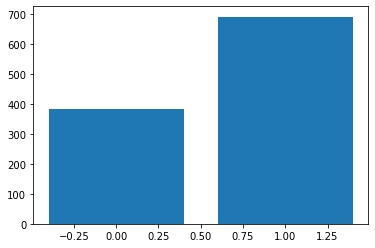

In [591]:
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [592]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

### To build the model, use the Random Forest classifier.

In [593]:
rf=RandomForestClassifier().fit(x_train,y_train)
rf

RandomForestClassifier()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [594]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [595]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [596]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

### This will yield the most effective parameters for our random forest classifier.

In [597]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

### Explore the estimator

In [598]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10)

### Investigate the optimal score for the random forest classifier's parameters.

In [599]:
grid_search.best_score_

0.8812569544276861

### Now, apply the above-mentioned parameters for the random forest classifier

In [600]:
rf=RandomForestClassifier(max_depth=80, max_features=3, 
                          min_samples_leaf=3, min_samples_split=10,
                          n_estimators=100).fit(x_train,y_train)
rf

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10)

### Let us now apply the predict to our test set. 

In [601]:
y_pred = rf.predict(x_test)

### We can use cross validation to further analyse the model's performance on its test set.

In [602]:
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(rf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(rf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(rf, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.91      0.64      0.75        78
           1       0.82      0.96      0.89       137

    accuracy                           0.85       215
   macro avg       0.87      0.80      0.82       215
weighted avg       0.86      0.85      0.84       215

Accuracy of Decision Tree classifier on the training set: 0.95
Accuracy of Decision Tree classifier on the test set: 0.85
Cross-validation score:  [0.88 0.87 0.88 0.9  0.86]
Cross-validation mean score:  0.8765809873521011


### Let's build a function that will return the results of various metrics.

In [603]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)

### Using the different classification metrics, summarise the model's results

In [604]:
summarize_classification(y_test, y_pred)

Length of testing data:  215
accuracy_count :  182
accuracy_score :  0.8465116279069768
f1_score :  0.8391832293913077
precision_score :  0.855507399577167
recall_score :  0.8465116279069768
jaccard_score :  0.7283160549173439


### Let us now compare how well our model predicts on unseen data.

In [618]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
118,0,1
149,0,0
140,0,0
185,1,1
209,1,1
80,0,0
28,1,1
62,0,0
152,1,1
208,0,0


# Prediction on a hold-out test set using (Support Vector Machine)
We would use the SVM classifier to estimate on our hold-out test set since it has generated 92 percent of the model's accuracy.

### Load the travel insurance dataset

In [605]:
datatest=pd.read_csv("TravelInsurance_Classification\TravelInsurance_TestSet.csv")
datatest.head(7)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2,True
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,True
2,3,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98,True
3,30,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270,False
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,False
5,3,192.88,-31.92,-25.80,1.70,290.22,0.02,-7.32,-11.79,1.98,-21.52,7.89,-3.41,24,True
6,3,208.88,-41.34,-28.30,0.74,293.22,0.29,-7.81,-12.45,1.49,-20.34,7.89,-3.07,52,True


### Pass all columns except 'class' to the variable X.

In [606]:
X=datatest[['F1','F2','F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']].values
X[0:5]

array([[ 0.00e+00,  1.97e+02, -3.95e+01, -2.48e+01,  1.80e+00,  2.84e+02,
        -2.60e-01, -9.05e+00, -2.06e+01,  1.17e+00, -2.20e+01,  7.89e+00,
        -3.38e+00,  2.00e+00],
       [ 3.00e+00,  1.97e+02, -3.17e+01, -3.15e+01,  1.48e+00,  3.68e+02,
        -9.00e-01, -6.35e+00, -1.26e+01,  1.64e+00, -1.83e+01,  7.89e+00,
        -3.77e+00,  1.00e+01],
       [ 3.00e+00,  1.61e+02, -3.31e+01, -2.58e+01,  1.74e+00,  3.29e+02,
         1.45e+00, -6.55e+00, -1.83e+01,  1.30e+00, -1.95e+01,  7.89e+00,
        -3.51e+00,  9.80e+01],
       [ 3.00e+01,  2.07e+02, -2.02e+01, -2.45e+01,  1.35e+01,  5.63e+02,
        -3.24e+00, -2.30e+00, -1.36e+01,  5.50e+00, -8.58e+00,  3.09e+01,
        -9.49e+00,  2.70e+02],
       [ 3.00e+00,  2.19e+02, -3.35e+01, -3.34e+01,  6.80e-01,  2.63e+02,
         1.41e+00, -6.80e+00, -2.23e+01,  1.01e+00, -2.29e+01,  7.89e+00,
        -3.56e+00,  1.06e+02]])

### Use the variable y to store the 'class' value, also known as the target variable that we will be predicting.

In [607]:
y=datatest[["Class"]] 
y[0:5]

,Class
0,True
1,True
2,True
3,False
4,False


### Standardize the dataset

In [608]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.22,  0.28, -1.41, -0.37, -0.87, -0.8 ,  0.69, -1.5 , -1.6 ,
        -0.91, -1.37, -0.8 ,  1.  , -0.93],
       [-1.  ,  0.28, -0.4 , -1.72, -0.92, -0.39,  0.43, -0.43,  0.6 ,
        -0.8 , -0.64, -0.8 ,  0.88, -0.9 ],
       [-1.  , -0.15, -0.58, -0.57, -0.88, -0.58,  1.37, -0.51, -0.98,
        -0.88, -0.87, -0.8 ,  0.96, -0.52],
       [ 1.  ,  0.4 ,  1.1 , -0.31,  0.83,  0.55, -0.51,  1.17,  0.34,
         0.09,  1.28,  2.45, -0.89,  0.22],
       [-1.  ,  0.55, -0.63, -2.08, -1.03, -0.9 ,  1.36, -0.61, -2.07,
        -0.95, -1.54, -0.8 ,  0.94, -0.48]])

### Let us now apply the predict to our test set.

In [609]:
y_pred = clf.predict(x_test)

### Prepare the model result

In [612]:
s = pd.Series(y_pred)

### Save the model result to file

In [613]:
s.to_csv("TravelInsurance_Classification\TravelInsurance_result.csv", index=False)

### Summary of the model perfomance 

In [614]:
result=[{ 'Accuracy Score':0.78,
         'F1 Score': 0.77,
         'Precision Score': 0.77,
         'Recall Score': 0.78,
         'Jaccard Score': 0.64},
        {'Accuracy Score':0.92,
         'F1 Score': 0.92,
         'Precision Score': 0.92,
         'Recall Score': 0.92,
         'Jaccard Score': 0.86},
        {'Accuracy Score': 0.89,
         'F1 Score': 0.89,
         'Precision Score': 0.89,
         'Recall Score': 0.89,
         'Jaccard Score': 0.81},
        {'Accuracy Score': 0.84,
         'F1 Score': 0.83,
         'Precision Score': 0.85,
         'Recall Score': 0.84,
         'Jaccard Score': 0.72}]
df=pd.DataFrame(result, index=['Decision Tree', 'Support Vector Machine','Logistic Regression', 'Random Forest'])
df.head()

,Accuracy Score,F1 Score,Precision Score,Recall Score,Jaccard Score
Decision Tree,0.78,0.77,0.77,0.78,0.64
Support Vector Machine,0.92,0.92,0.92,0.92,0.86
Logistic Regression,0.89,0.89,0.89,0.89,0.81
Random Forest,0.84,0.83,0.85,0.84,0.72
